In [3]:
# Imports
import numpy as np
import yfinance as yf
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Retrieve SP500 adjusted closing daily price data for period of 2015-2021 
stocks = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)
s_p500 = yf.download(stocks, start=start, end = end, interval='1d')['Adj Close']
s_p500.head(10)

[*********************100%***********************]  1 of 1 completed


Date
2014-12-31    2058.899902
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
2015-01-09    2044.810059
2015-01-12    2028.260010
2015-01-13    2023.030029
2015-01-14    2011.270020
Name: Adj Close, dtype: float64

In [5]:
# Multiply by 100 to achieve better convergence during optimization process and compute realized volatility with window length of 5
ret = 100 * (s_p500.pct_change()[1:])
realized_vol = ret.rolling(5).std()

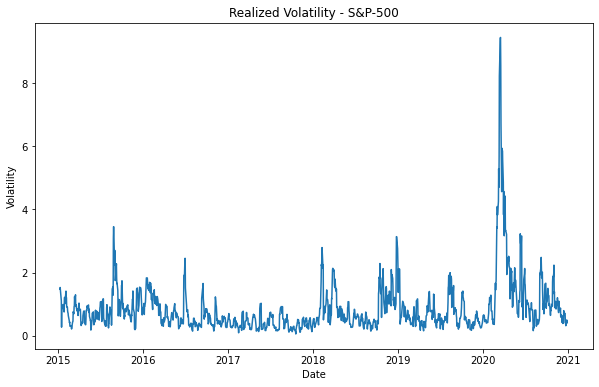

In [6]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index, realized_vol)
plt.title('Realized Volatility - S&P-500') 
plt.ylabel('Volatility')
plt.xlabel('Date') 
plt.show()

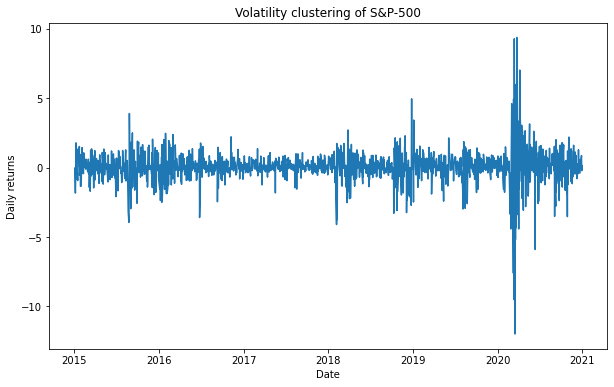

In [7]:
# Plot volatility clustering
plt.figure(figsize=(10,6))
plt.plot(s_p500.index[1:], ret)
plt.title('Volatility clustering of S&P-500') 
plt.ylabel('Daily returns')
plt.xlabel('Date') 
plt.show()